## Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn import datasets 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
concated_nothot = pd.read_csv('/Users/mariasoriano/Desktop/song_recommender2/data/feats_concated_nothot.csv')
concated_hot100 = pd.read_csv('/Users/mariasoriano/Desktop/song_recommender2/data/feats_concated_top100.csv')

In [3]:
df = pd.concat([concated_hot100, concated_nothot], ignore_index=True)

In [4]:
df = df.drop(columns=['Unnamed: 0'], axis=1)

In [6]:
X = df.drop(columns=['title', 'artist', 'id', 'type', 'uri', 'track_href', 'analysis_url'], axis=1)

In [8]:
X.replace("Null", 0, inplace=True)

#### Applying the StandardScaler()
- Apply StandardScaler() to data
- Save the scaler

In [9]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
#display(X.head())
#print()
display(X_scaled_df.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1.194205,0.030892,1.694618,0.562213,0.737388,0.055825,0.107840,-0.646203,-0.583412,0.377626,-1.030344,-0.032867,0.330814
1,0.340520,0.858759,-1.114642,0.755887,0.737388,-0.388780,-0.955228,-0.646222,-0.514787,0.180550,1.601699,-0.480670,0.330814
2,1.515592,-0.353599,-0.833716,0.598595,0.737388,0.534186,-1.049573,-0.646222,1.084375,-1.202701,-1.263143,-0.209483,0.330814
3,0.862774,0.082850,-0.271864,0.727437,0.737388,-0.379135,-0.265305,-0.646222,1.147335,-0.053710,0.183213,-0.356964,0.330814
4,0.270216,-0.228900,-1.395568,0.341184,-1.356137,-0.050263,-0.111813,-0.646222,-0.464419,1.489433,2.663732,-0.137594,0.330814


In [11]:
filename = "/Users/mariasoriano/Desktop/song_recommender2/scalers/standard_scaler.pkl"
with open(filename, "wb") as file: 
    pickle.dump(scaler,file)

## Clustering  with DBSCAN
- Finding Best Epsilon
- Model Application

In [12]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(X_scaled_df)
distances, indices = neighbors_fit.kneighbors(X_scaled_df)

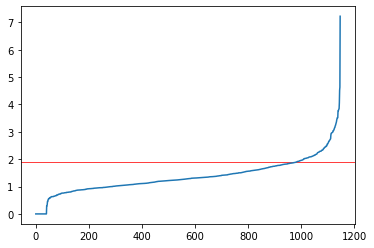

In [13]:
distances2 = distances
distances2 = np.sort(distances2, axis=0)
distances2 = distances2[:,1]
epsilon = 1.9
plt.axhline(epsilon, color='red', linewidth=0.5)
plt.axhline(epsilon, color='red', linewidth=0.5)
plt.plot(distances2)

#### Model Application

In [14]:
from sklearn.cluster import DBSCAN
from scipy.spatial import distance_matrix

In [17]:
model = DBSCAN(eps=1.9, min_samples=15)

# Let's save the model in a pickle
filename = "/Users/mariasoriano/Desktop/song_recommender2/model/dbscan.pickle" # Path with filename
with open(filename, "wb") as file:
    pickle.dump(model,file)
    
yhat = model.fit_predict(X_scaled_df)

In [18]:
clusters = np.unique(yhat)
clusters

array([-1,  0,  1,  2,  3,  4])

In [20]:
hot100 = concated_hot100.copy()
hot100['cluster'] = yhat[:100]
hot100.to_csv('/Users/mariasoriano/Desktop/song_recommender2/data/hot100_clustered_dbscan.csv')

In [21]:
not_hot100 = concated_nothot.copy()
not_hot100['cluster'] = yhat[100:]
not_hot100.to_csv('/Users/mariasoriano/Desktop/Ironhack/lab-web-scraping-single-page/data/nothot_clustered_dbscan.csv')